In [10]:
import sys
!{sys.executable} -m pip install imbalanced-learn xgboost

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/c7/b5/56f1ceb568676c0231d12b2fed17ebfd606dd1f627e7372aaed5dd56bd97/imbalanced_learn-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<0.2,>=0.1.5 from https://files.pythonhosted.org/packages/53/60/08cb1b41563a0a8f26a72b8c5d1726986ab535fee67aa95541b2a2cc1dfa/sklearn_compat-0.1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.4 kB 262.6 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/235.4 kB 262.6 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/235.4 kB 262.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/235.4 kB 131.3 kB/s eta 0:00:02
   ---------- --------


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE # Veri dengeleme
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# 1. VERİYİ OKU
df = pd.read_csv('parkinsons.csv')

# Veriyi görelim
print("Veri Seti Yüklendi! Boyut:", df.shape)
display(df.head())

Veri Seti Yüklendi! Boyut: (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


VERİYİ TEMİZLEME


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veriyi Yükle
df = pd.read_csv('parkinsons.csv')

# 2. İlk Bakış
print(f"Veri Seti Boyutu: {df.shape}")
print("\n--- Sütun Tipleri ve Boş Veri Durumu ---")
df.info()

print("\n--- Temel İstatistikler ---")
display(df.describe().T) # Transpose (.T) ile tabloyu yan çevirip daha rahat okuruz

Veri Seti Boyutu: (195, 24)

--- Sütun Tipleri ve Boş Veri Durumu ---
<class 'pandas.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    str    
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null  

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


✅ 'name' sütunu silindi.
✅ Tekrar eden veri yok. Veri seti benzersiz.


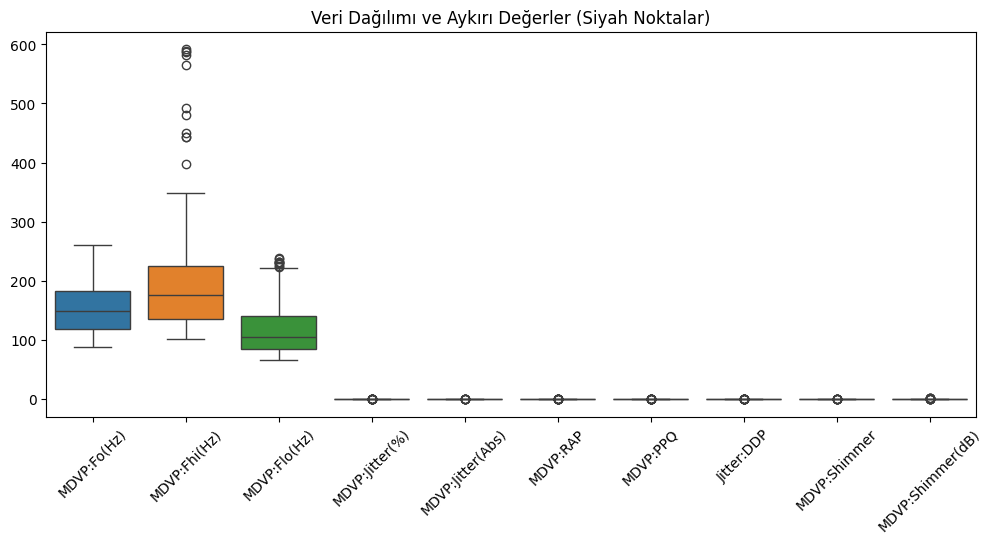


--- TEMİZLİK SONRASI DURUM ---
<class 'pandas.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 n

In [7]:
# --- ADIM 1: SADECE VERİ TEMİZLİĞİ (DATA CLEANING) ---

# 1. Gereksiz 'name' sütununu atalım
# (Model sadece sayıları anlar, isimler işi bozar)
if 'name' in df.columns:
    df = df.drop(['name'], axis=1)
    print("✅ 'name' sütunu silindi.")
else:
    print("ℹ️ 'name' sütunu zaten yok.")

# 2. Tekrar Eden (Duplicate) Satır Kontrolü
# Aynı hastanın verisi yanlışlıkla iki kere kaydedilmiş mi?
tekrar_eden = df.duplicated().sum()

if tekrar_eden > 0:
    print(f"⚠️ Dikkat: {tekrar_eden} adet tekrar eden satır bulundu ve siliniyor...")
    df = df.drop_duplicates()
    print("✅ Tekrarlar temizlendi.")
else:
    print("✅ Tekrar eden veri yok. Veri seti benzersiz.")

# 3. Aykırı Değer (Outlier) Kontrolü (Sadece Gözlem)
# Jitter ve Shimmer değerlerinde aşırı uçuk kaçık sayılar var mı bakalım.
# NOT: Parkinson hastalarında değerler yüksek çıkabilir, o yüzden bunları silmiyoruz, sadece görüyoruz.

plt.figure(figsize=(12, 5))
sns.boxplot(data=df.iloc[:, 0:10]) # İlk 10 sütunun dağılımı
plt.xticks(rotation=45)
plt.title('Veri Dağılımı ve Aykırı Değerler (Siyah Noktalar)')
plt.show()

print("\n--- TEMİZLİK SONRASI DURUM ---")
df.info()